In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

### 1. Carregar o conjunto de dados

In [2]:
df = pd.read_csv("../data/Student_Depression_Cleaned.csv", sep=',')

### 2. Definição das features e o target

In [3]:
features = [
    'Academic Pressure', 'Have you ever had suicidal thoughts ?', 'Weighted Stress', 'Academic_Work_Interaction',
    'Financial Stress', 'Risk Group', 'Academic_Financial_Interaction', 'Work_Financial_Interaction',
]

X = df[features]
y = df['Depression']

### 3. Divisão dos dados em conjuntos de treino e teste

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

#### 3.1. Padronização dos dados

In [5]:
#scaler = StandardScaler()
#X_train_scaled = scaler.fit_transform(X_train)
#X_test_scaled = scaler.transform(X_test)

### 4. Definição da grade de parâmetros para o GridSearchCV e Treinamento do Modelo

In [6]:
#param_grid = {
#    'C': [0.1, 1, 10, 50, 100],
#    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#    'kernel': ['rbf']
#}

In [7]:
#grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=2, cv=10)
#grid.fit(X_train_scaled, y_train)

In [8]:
#best_model = grid.best_estimator_
#print(f"Melhores parâmetros encontrados: {grid.best_params_}")

In [9]:
#joblib.dump(best_model, '../modelos/models/svm_best_model.pkl')
#joblib.dump(scaler, '../modelos/models/svm_scaler.pkl')

#### 4.1 Aplicando SVM com o modelo salvo

In [10]:
best_model = joblib.load('../modelos/models/svm_best_model.pkl')
scaler = joblib.load('../modelos/models/svm_scaler.pkl')

In [11]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

### 5. Cálculo Ein e Eout

In [13]:
ein = 1 - accuracy_score(y_train, y_train_pred)
eout = 1 - accuracy_score(y_test, y_test_pred)
print(f"Erro dentro da amostra (Ein): {ein:.4f}")
print(f"Erro fora da amostra (Eout): {eout:.4f}")

Erro dentro da amostra (Ein): 0.1687
Erro fora da amostra (Eout): 0.1702


### 6. Cálculo do valor esperado de Eout (limite superior)

In [14]:
n_support_vectors = best_model.support_vectors_.shape[0]
n_training_samples = X_train.shape[0]
expected_eout_bound = n_support_vectors / n_training_samples

print(f"Número de vetores de suporte: {n_support_vectors}")
print(f"Tamanho do conjunto de treino: {n_training_samples}")
print(f"Valor esperado de Eout (limite superior): {expected_eout_bound:.4f}")

Número de vetores de suporte: 8425
Tamanho do conjunto de treino: 19483
Valor esperado de Eout (limite superior): 0.4324


### 7. Gráfico de Erros

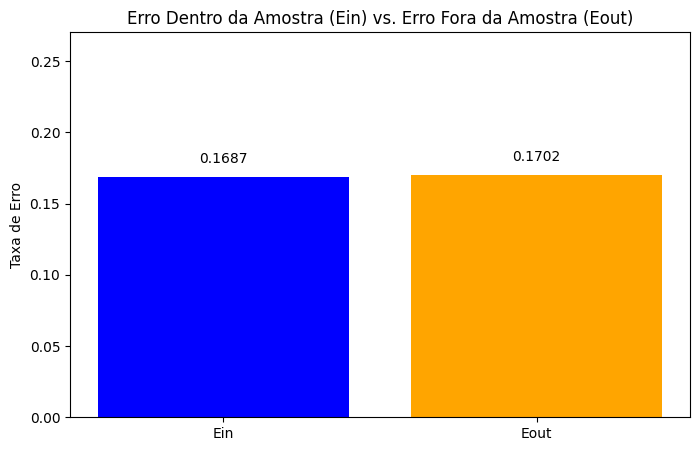

In [15]:
plt.figure(figsize=(8, 5))
plt.bar(['Ein', 'Eout'], [ein, eout], color=['blue', 'orange'])
plt.title('Erro Dentro da Amostra (Ein) vs. Erro Fora da Amostra (Eout)')
plt.ylabel('Taxa de Erro')
plt.ylim(0, max(ein, eout) + 0.1)
for i, v in enumerate([ein, eout]):
    plt.text(i, v + 0.01, f"{v:.4f}", ha='center')
plt.show()

### 8. Métricas de classificação

In [16]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3500
           1       0.83      0.88      0.86      4850

    accuracy                           0.83      8350
   macro avg       0.83      0.82      0.82      8350
weighted avg       0.83      0.83      0.83      8350



### 9. Matriz de Confusão

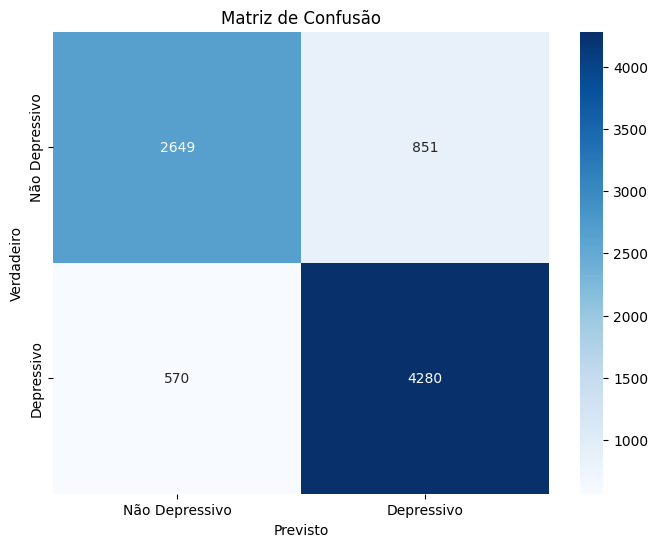

In [17]:
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Não Depressivo', 'Depressivo'], yticklabels=['Não Depressivo', 'Depressivo'])
plt.title('Matriz de Confusão')
plt.ylabel('Verdadeiro')
plt.xlabel('Previsto')
plt.show()